# Trading Data Exploration

This notebook explores the USATECH index data and performs initial analysis to understand the dataset.

In [4]:
# Add parent directory to path to import from src
import sys
import os
sys.path.append(os.path.abspath('..'))

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import from src modules
from src.data.loader import load_data, preprocess_data
from src.utils.helpers import set_pandas_display_options

# Set display options
set_pandas_display_options()

# Matplotlib settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]
%matplotlib inline

## 1. Load Data

Load the 15-minute and 5-minute USATECH index data.

In [5]:
# Load 15-minute data
file_path_15m = '../USATECH.IDXUSD_Candlestick_15_M_BID_01.01.2023-18.01.2025.csv'
df_15m = load_data(file_path_15m)
df_15m = preprocess_data(df_15m)

# Load 5-minute data
file_path_5m = '../USATECH.IDXUSD_Candlestick_5_M_BID_01.01.2023-18.01.2025.csv'
df_5m = load_data(file_path_5m)
df_5m = preprocess_data(df_5m)

# Print basic info
print(f"15-minute data: {len(df_15m)} rows from {df_15m.index.min()} to {df_15m.index.max()}")
print(f"5-minute data: {len(df_5m)} rows from {df_5m.index.min()} to {df_5m.index.max()}")

15-minute data: 50557 rows from 2023-01-02 06:00:00+07:00 to 2025-01-18 04:00:00+07:00
5-minute data: 215712 rows from 2023-01-01 00:00:00+07:00 to 2025-01-18 23:55:00+07:00


## 2. Data Overview

Let's examine the first few rows of the data to understand its structure.

In [6]:
# Display first few rows of 15-minute data
print("15-minute data sample:")
df_15m.head()

15-minute data sample:


,Open,High,Low,Close,Volume
timestamp,,,,,
2023-01-02 06:00:00+07:00,10958.4390,10958.4390,10958.4390,10958.4390,0.0000
2023-01-02 06:15:00+07:00,10958.4390,10958.4390,10958.4390,10958.4390,0.0000
2023-01-02 06:30:00+07:00,10958.4390,10958.4390,10958.4390,10958.4390,0.0000
2023-01-02 06:45:00+07:00,10958.4390,10958.4390,10958.4390,10958.4390,0.0000
2023-01-02 07:00:00+07:00,10958.4390,10958.4390,10958.4390,10958.4390,0.0000


In [7]:
# Check for missing values
print("Missing values in 15-minute data:")
df_15m.isna().sum()

Missing values in 15-minute data:


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [8]:
# Statistical summary of 15-minute data
df_15m.describe()

,Open,High,Low,Close,Volume
count,50557.0000,50557.0000,50557.0000,50557.0000,50557.0000
mean,16750.1325,16760.5984,16739.2190,16750.2816,888930.5495
std,2901.6835,2902.5340,2900.4598,2901.6460,1008740.4301
min,10687.3270,10710.0790,10674.6490,10687.3390,0.0000
25%,14738.0490,14748.3890,14727.2090,14738.1570,171999.9993
50%,16823.6890,16828.0210,16823.6890,16823.6890,515160.0057
75%,19375.7430,19393.3210,19354.8990,19375.7760,1223319.9962
max,22125.8210,22132.7090,22116.1540,22126.1430,6091109.9614


## 3. Price Visualization

Let's visualize the price data to get a better understanding of the trends and patterns.

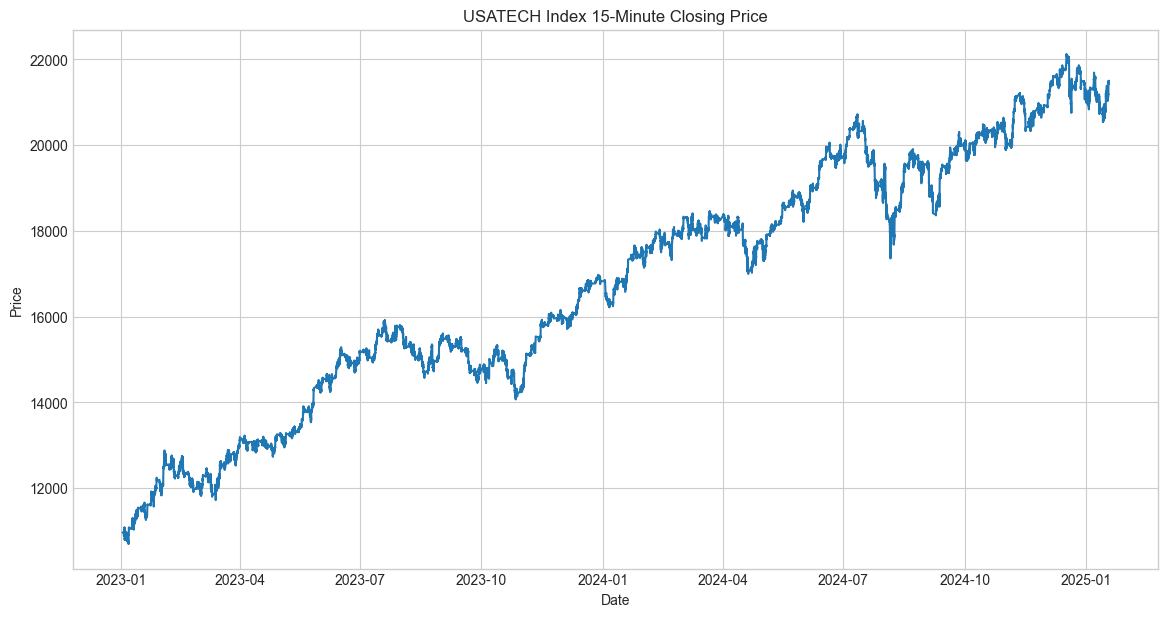

In [9]:
# Plot closing price for the entire period
plt.figure(figsize=(14, 7))
plt.plot(df_15m.index, df_15m['Close'])
plt.title('USATECH Index 15-Minute Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

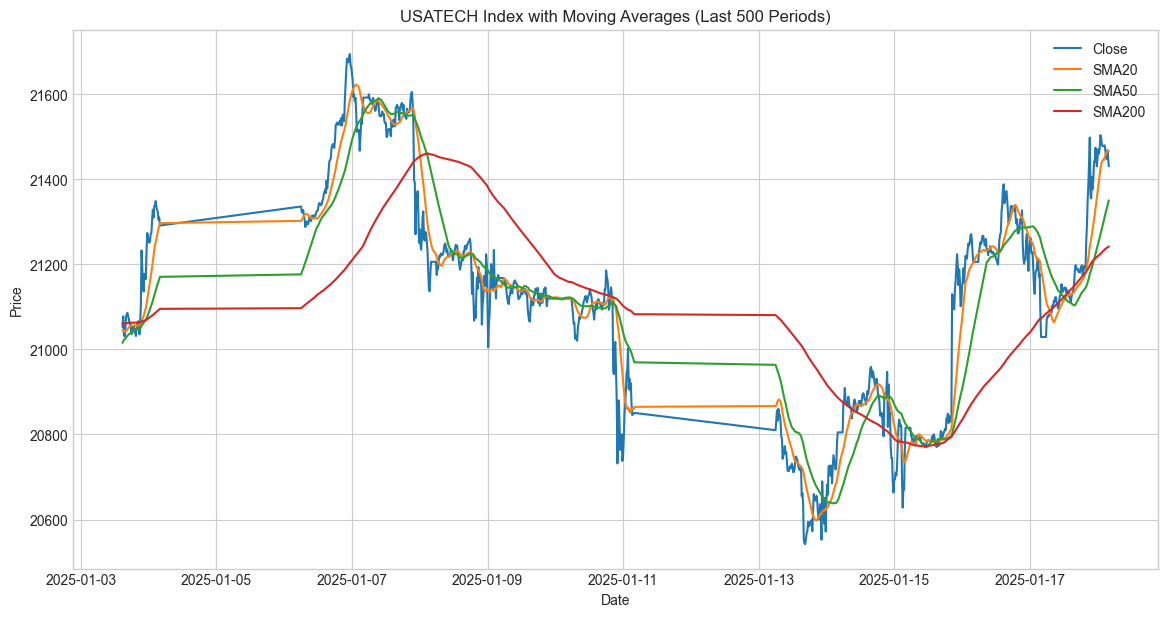

In [14]:
# Add some basic technical indicators for visualization
df_15m['SMA20'] = df_15m['Close'].rolling(window=20).mean()
df_15m['SMA50'] = df_15m['Close'].rolling(window=50).mean()
df_15m['SMA200'] = df_15m['Close'].rolling(window=200).mean()

# Plot recent data with moving averages
recent_data = df_15m.iloc[-1000:]
plt.figure(figsize=(14, 7))
plt.plot(recent_data.index, recent_data['Close'], label='Close')
plt.plot(recent_data.index, recent_data['SMA20'], label='SMA20')
plt.plot(recent_data.index, recent_data['SMA50'], label='SMA50')
plt.plot(recent_data.index, recent_data['SMA200'], label='SMA200')
plt.title('USATECH Index with Moving Averages (Last 500 Periods)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## 4. Daily Returns Analysis

Let's analyze the daily returns to understand the volatility and distribution.

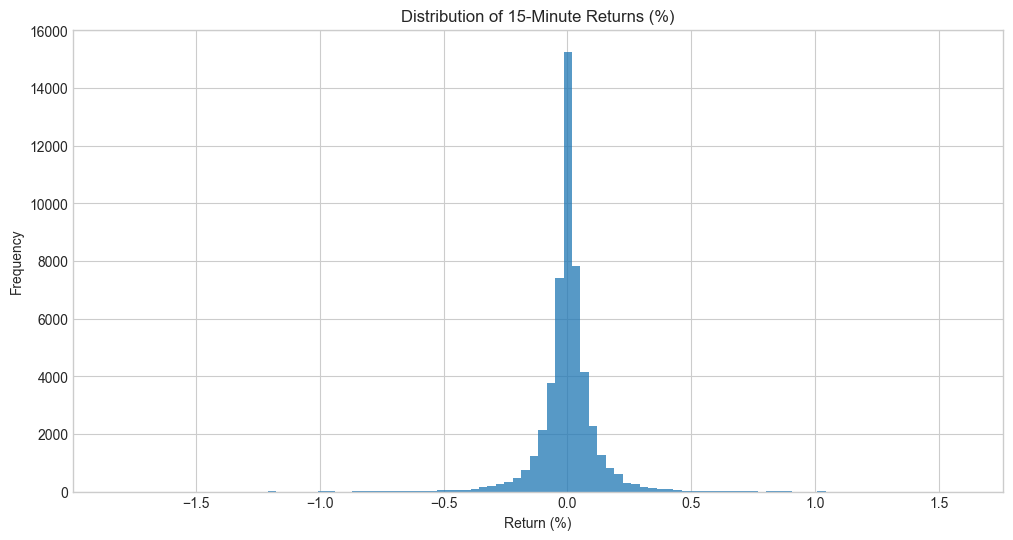

In [11]:
# Calculate daily returns
df_15m['Returns'] = df_15m['Close'].pct_change() * 100

# Plot returns distribution
plt.figure(figsize=(12, 6))
plt.hist(df_15m['Returns'].dropna(), bins=100, alpha=0.75)
plt.title('Distribution of 15-Minute Returns (%)')
plt.xlabel('Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
# Calculate summary statistics for returns
returns_stats = df_15m['Returns'].describe()
print("Returns Statistics:")
print(returns_stats)

# Calculate additional metrics
print(f"Skewness: {df_15m['Returns'].skew():.4f}")
print(f"Kurtosis: {df_15m['Returns'].kurtosis():.4f}")

Returns Statistics:
count   50556.0000
mean        0.0014
std         0.1114
min        -1.8240
25%        -0.0339
50%         0.0000
75%         0.0396
max         1.5876
Name: Returns, dtype: float64
Skewness: -0.2574
Kurtosis: 16.7293


## 5. Volatility Analysis

Let's analyze the volatility of the index over time.

/var/folders/zh/thr0k2tj2wjbzl039k2_c6yh0000gn/T/ipykernel_91959/2607619793.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_15m['Volatility'].fillna(0, inplace=True)


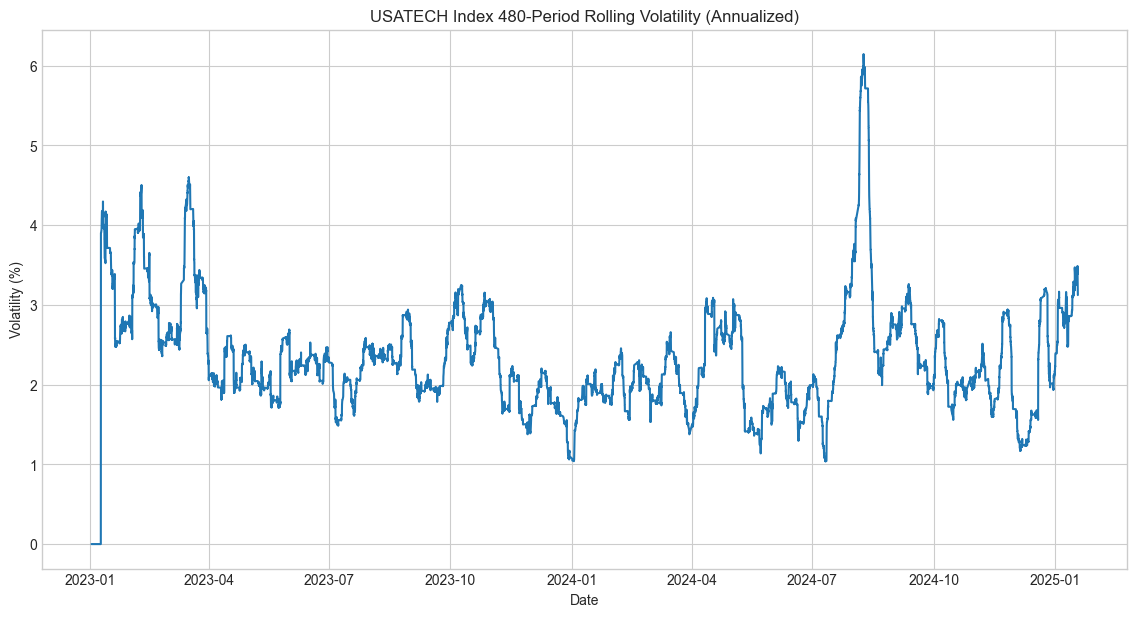

In [19]:
# Calculate rolling volatility (standard deviation of returns)
window = 20 * 24  # Approximately 20 trading days (assuming 24 15-min periods per day)
df_15m['Volatility'] = df_15m['Returns'].rolling(window=window).std() * np.sqrt(window)


df_15m['Volatility'].fillna(0, inplace=True)

# Plot volatility over time
plt.figure(figsize=(14, 7))
plt.plot(df_15m.index, df_15m['Volatility'].dropna())
plt.title(f'USATECH Index {window}-Period Rolling Volatility (Annualized)')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.grid(True)
plt.show()

## 6. Volume Analysis

Let's analyze the trading volume patterns.

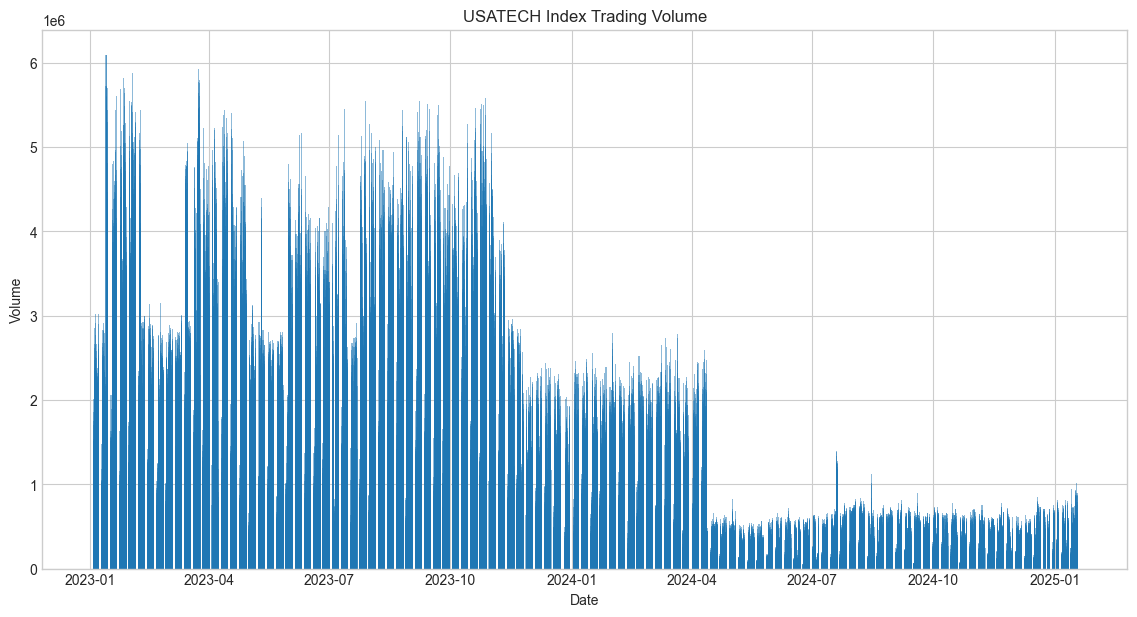

In [20]:
# Plot volume
plt.figure(figsize=(14, 7))
plt.bar(df_15m.index, df_15m['Volume'], alpha=0.5)
plt.title('USATECH Index Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

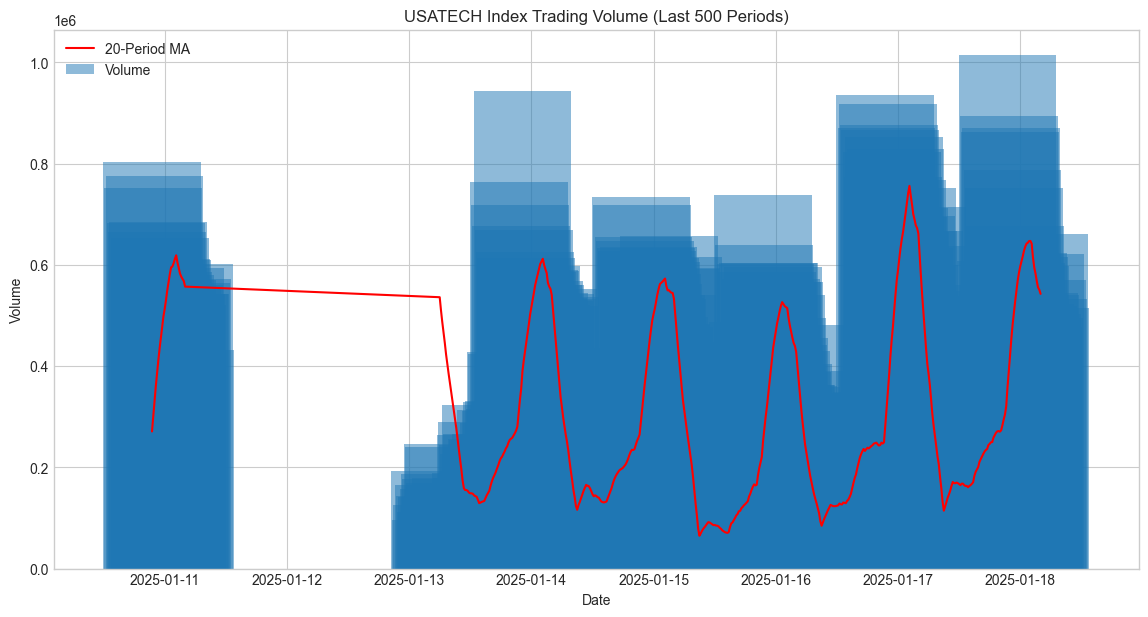

In [21]:
# Calculate rolling average volume
df_15m['Volume_SMA20'] = df_15m['Volume'].rolling(window=20).mean()

# Plot recent volume with moving average
recent_data = df_15m.iloc[-500:]
plt.figure(figsize=(14, 7))
plt.bar(recent_data.index, recent_data['Volume'], alpha=0.5, label='Volume')
plt.plot(recent_data.index, recent_data['Volume_SMA20'], color='red', label='20-Period MA')
plt.title('USATECH Index Trading Volume (Last 500 Periods)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

## 7. Time-of-Day Analysis

Let's analyze if there are patterns based on the time of day.

In [22]:
# Extract hour of day
df_15m['Hour'] = df_15m.index.hour

# Analyze returns by hour
hourly_returns = df_15m.groupby('Hour')['Returns'].agg(['mean', 'std', 'count'])
hourly_returns.columns = ['Average Return (%)', 'Std Dev (%)', 'Count']
hourly_returns

,Average Return (%),Std Dev (%),Count
Hour,,,
0,0.0037,0.1368,2129
1,0.0028,0.1410,2125
2,-0.0025,0.1576,2124
3,0.0037,0.1136,1926
4,-0.0025,0.0494,1749
5,0.0030,0.1044,1984
6,0.0030,0.0741,2139
7,-0.0016,0.0629,2140
8,0.0013,0.0620,2140


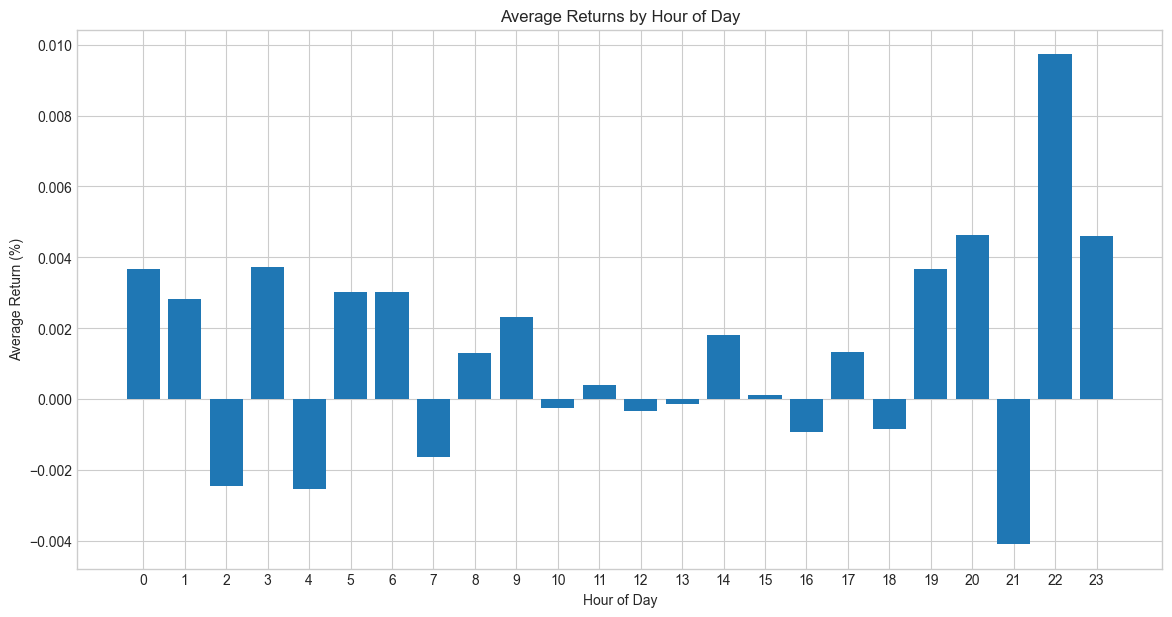

In [23]:
# Plot average returns by hour
plt.figure(figsize=(14, 7))
plt.bar(hourly_returns.index, hourly_returns['Average Return (%)'])
plt.title('Average Returns by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Return (%)')
plt.grid(True)
plt.xticks(range(24))
plt.show()

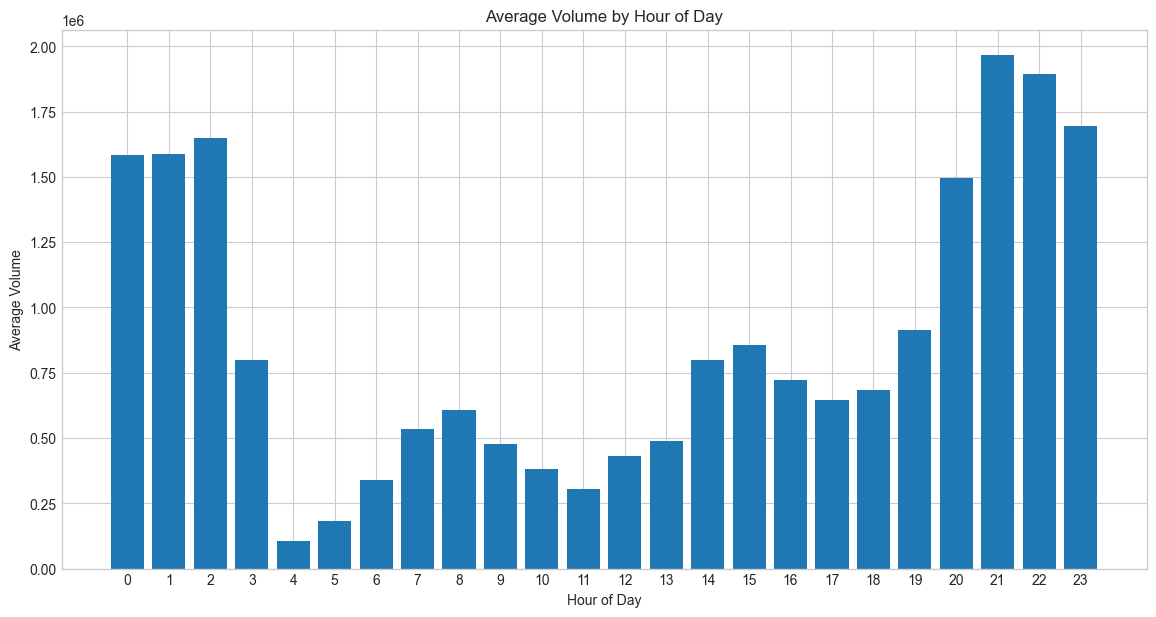

In [24]:
# Plot average volume by hour
hourly_volume = df_15m.groupby('Hour')['Volume'].mean()
plt.figure(figsize=(14, 7))
plt.bar(hourly_volume.index, hourly_volume)
plt.title('Average Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Volume')
plt.grid(True)
plt.xticks(range(24))
plt.show()

## 8. Day of Week Analysis

Let's analyze if there are patterns based on the day of the week.

In [25]:
# Extract day of week
df_15m['DayOfWeek'] = df_15m.index.dayofweek
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Analyze returns by day of week
day_returns = df_15m.groupby('DayOfWeek')['Returns'].agg(['mean', 'std', 'count'])
day_returns.index = [days[i] for i in day_returns.index]
day_returns.columns = ['Average Return (%)', 'Std Dev (%)', 'Count']
day_returns

,Average Return (%),Std Dev (%),Count
Monday,0.0030,0.1051,7975
Tuesday,-0.0003,0.1013,10272
Wednesday,0.0009,0.1055,10272
Thursday,0.0029,0.1222,10272
Friday,0.0007,0.1167,10272
Saturday,0.0018,0.1327,1493


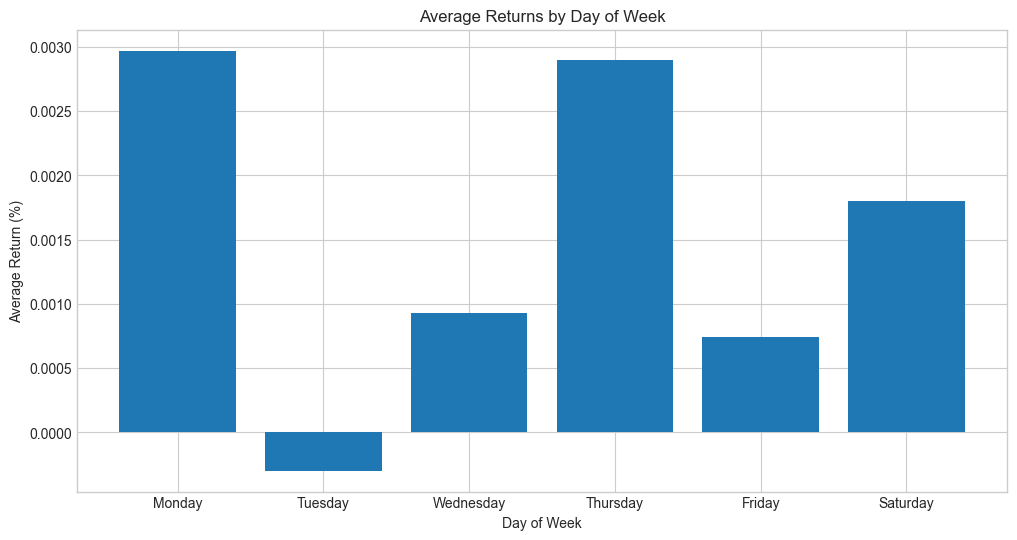

In [26]:
# Plot average returns by day of week
plt.figure(figsize=(12, 6))
plt.bar(day_returns.index, day_returns['Average Return (%)'])
plt.title('Average Returns by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Return (%)')
plt.grid(True)
plt.show()

## 9. Correlation Analysis

Let's analyze the correlation between different variables.

In [27]:
# Calculate correlations
df_corr = df_15m[['Open', 'High', 'Low', 'Close', 'Volume', 'Returns', 'Volatility']].dropna().corr()
df_corr

,Open,High,Low,Close,Volume,Returns,Volatility
Open,1.0000,1.0000,1.0000,1.0000,-0.5178,-0.0077,-0.1791
High,1.0000,1.0000,1.0000,1.0000,-0.5162,-0.0048,-0.1782
Low,1.0000,1.0000,1.0000,1.0000,-0.5195,-0.0043,-0.1800
Close,1.0000,1.0000,1.0000,1.0000,-0.5178,-0.0016,-0.1790
Volume,-0.5178,-0.5162,-0.5195,-0.5178,1.0000,0.0013,0.1366
Returns,-0.0077,-0.0048,-0.0043,-0.0016,0.0013,1.0000,0.0089
Volatility,-0.1791,-0.1782,-0.1800,-0.1790,0.1366,0.0089,1.0000


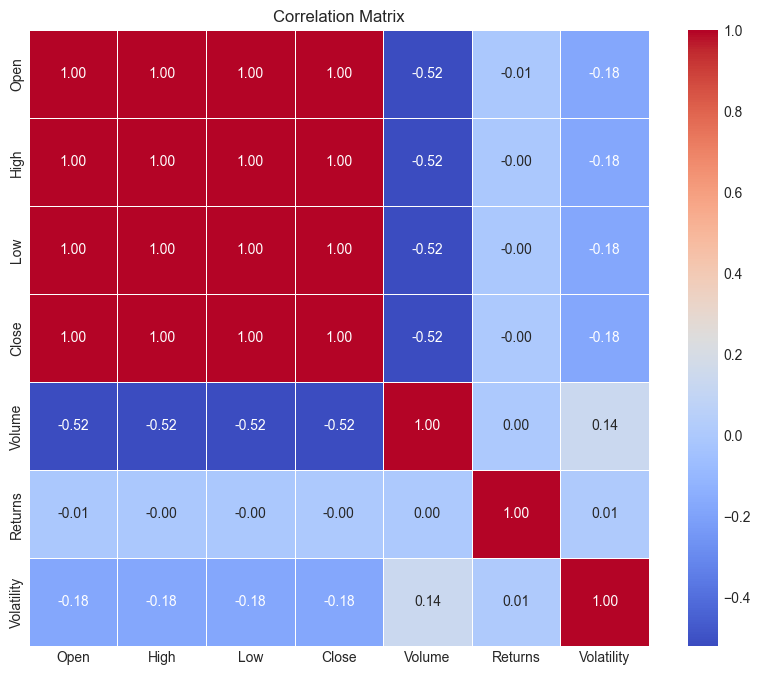

In [28]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## 10. Moving Average Crossover Analysis

Let's identify and visualize moving average crossovers, which are common trading signals.

In [29]:
# Identify MA crossovers
df_15m['Golden_Cross'] = ((df_15m['SMA50'].shift(1) < df_15m['SMA200'].shift(1)) & 
                         (df_15m['SMA50'] >= df_15m['SMA200'])).astype(int)
df_15m['Death_Cross'] = ((df_15m['SMA50'].shift(1) > df_15m['SMA200'].shift(1)) & 
                        (df_15m['SMA50'] <= df_15m['SMA200'])).astype(int)

# Find crossover dates
golden_cross_dates = df_15m[df_15m['Golden_Cross'] == 1].index
death_cross_dates = df_15m[df_15m['Death_Cross'] == 1].index

print(f"Found {len(golden_cross_dates)} golden crosses and {len(death_cross_dates)} death crosses")

# Print first few crossover dates
print("\nSome Golden Cross dates:")
for date in golden_cross_dates[:5]:
    print(date)

print("\nSome Death Cross dates:")
for date in death_cross_dates[:5]:
    print(date)

Found 146 golden crosses and 145 death crosses

Some Golden Cross dates:
2023-01-07 03:30:00+07:00
2023-01-17 22:00:00+07:00
2023-01-21 00:30:00+07:00
2023-01-26 11:15:00+07:00
2023-02-01 06:45:00+07:00

Some Death Cross dates:
2023-01-17 20:00:00+07:00
2023-01-19 04:45:00+07:00
2023-01-25 15:15:00+07:00
2023-01-31 00:30:00+07:00
2023-02-06 12:15:00+07:00


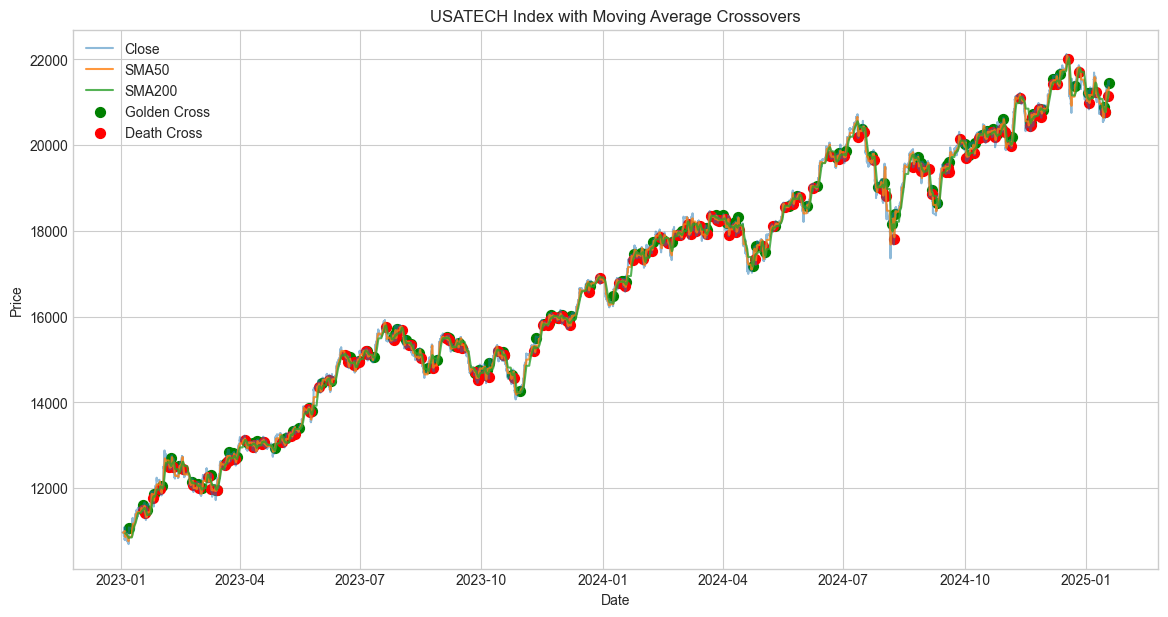

In [30]:
# Plot price with moving averages and crossovers
plt.figure(figsize=(14, 7))
plt.plot(df_15m.index, df_15m['Close'], label='Close', alpha=0.5)
plt.plot(df_15m.index, df_15m['SMA50'], label='SMA50', alpha=0.8)
plt.plot(df_15m.index, df_15m['SMA200'], label='SMA200', alpha=0.8)
plt.scatter(golden_cross_dates, df_15m.loc[golden_cross_dates, 'Close'], color='green', s=50, label='Golden Cross')
plt.scatter(death_cross_dates, df_15m.loc[death_cross_dates, 'Close'], color='red', s=50, label='Death Cross')
plt.title('USATECH Index with Moving Average Crossovers')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Analyze returns after crossovers
forward_periods = [1, 5, 10, 20, 50]
results = []

for periods in forward_periods:
    # Golden Cross returns
    golden_future_returns = []
    for date in golden_cross_dates:
        idx = df_15m.index.get_loc(date)
        if idx + periods < len(df_15m):
            future_return = (df_15m['Close'].iloc[idx + periods] / df_15m['Close'].iloc[idx] - 1) * 100
            golden_future_returns.append(future_return)
    
    # Death Cross returns
    death_future_returns = []
    for date in death_cross_dates:
        idx = df_15m.index.get_loc(date)
        if idx + periods < len(df_15m):
            future_return = (df_15m['Close'].iloc[idx + periods] / df_15m['Close'].iloc[idx] - 1) * 100
            death_future_returns.append(future_return)
    
    results.append({
        'Periods': periods,
        'Golden_Cross_Avg_Return': np.mean(golden_future_returns) if golden_future_returns else np.nan,
        'Death_Cross_Avg_Return': np.mean(death_future_returns) if death_future_returns else np.nan,
        'Golden_Cross_Win_Rate': np.mean([r > 0 for r in golden_future_returns]) * 100 if golden_future_returns else np.nan,
        'Death_Cross_Win_Rate': np.mean([r < 0 for r in death_future_returns]) * 100 if death_future_returns else np.nan
    })

# Display results
df_results = pd.DataFrame(results)
df_results

,Periods,Golden_Cross_Avg_Return,Death_Cross_Avg_Return,Golden_Cross_Win_Rate,Death_Cross_Win_Rate
0,1,0.0097,-0.0012,55.4795,41.3793
1,5,0.0304,-0.0192,53.4247,46.8966
2,10,0.0433,0.0159,56.1644,46.8966
3,20,0.0744,0.0266,60.2740,48.9655
4,50,0.1410,0.0317,57.2414,44.1379


## Summary and Conclusions

Based on the analysis above, here are some key observations about the USATECH index data:

1. The dataset provides good coverage from January 2023 to January 2025 with both 5-minute and 15-minute timeframes.
2. [Add your observations here based on the analysis results]
3. [Add more observations]

These insights will inform our feature engineering and model development process in subsequent notebooks.